# Phase 3 Final Project

* Kevin Gross
* Part Time Flatiron Student

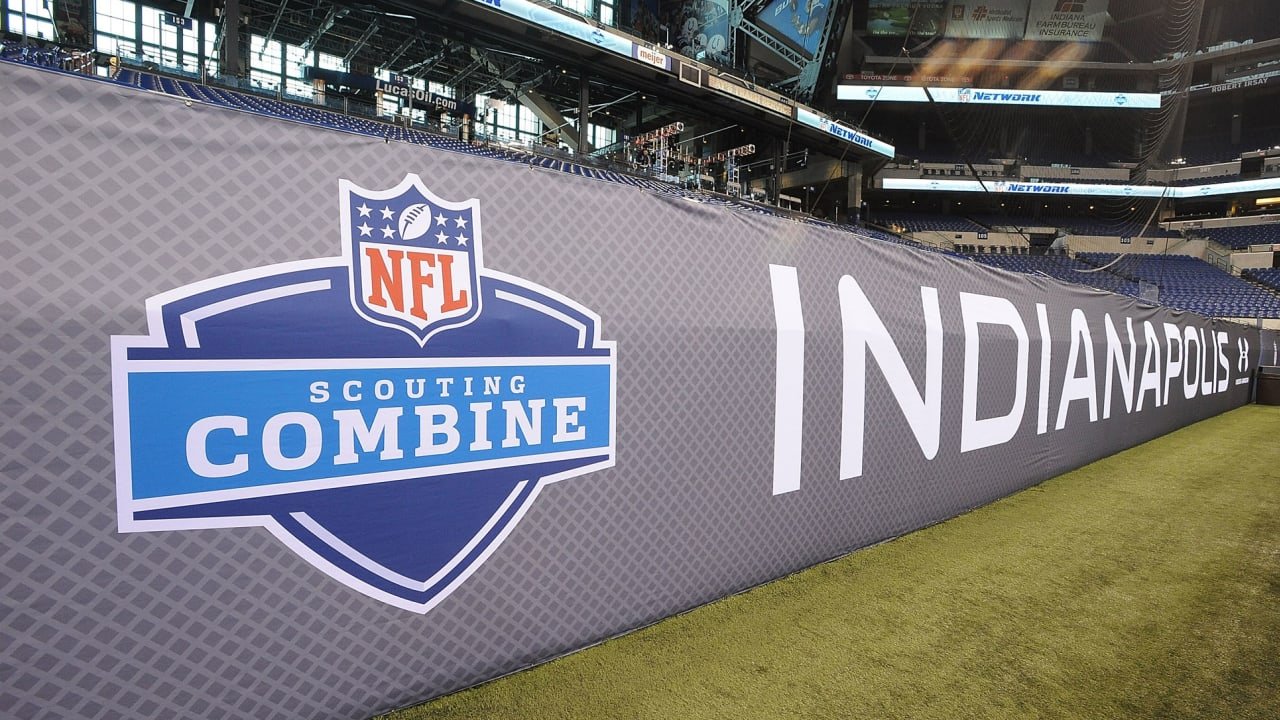

## NFL Combine Data Analysis

### General Overview

### Buisness Problem

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [ ]:
df = pd.read_csv('NFL.csv')

In [ ]:
display(df.head())
print(df.shape)

Right off the bat, we can see that we have almost 3,500 rows, each with 17 feature columns and 1 target column:

* `Year`: Year of attendance at the NFL combine
* `Player`: Player name
* `Age`: Players age (years)
* `School`: College attended
* `Height`: Height (meters)
* `Weight`: Weight (kilograms)
* `Sprint_40yd`: 40 yard sprint time (seconds)
* `Vertical_Jump`: Vertical jump result (centimeters) 
* `Bench_Press_Reps`: Maximum bench press repetitions achieved while lifting 102.1 kg (225 lb) weight
* `Broad_Jump`: Broad jump result (centimeters)
* `Agility_3cone`: Three-cone agility test time (seconds)
* `Shuttle`: Lateral shuttle time (seconds)
* `Drafted..tm.rnd.yr.`: Team the athlete was drafted by, draft round, draft pick, and year
* `BMI`: Body mass index (kg/m2)
* `Player_Type`: Offensive or defensive player or special teams
* `Position_Type`: Broad classification of the athlete's playing position
* `Position`: Playing position
* `Drafted`: Was the player drafted during the NFL draft?

This is a fairly balanced dataset, with 65% of the combine attendees drafted and 35% not drafted.

In [ ]:
print("Raw Counts")
print(df['Drafted'].value_counts())
print()
print("Percentages")
print(df['Drafted'].value_counts(normalize=True))

Thus, a baseline model that always chose the majority class (in this case that a player was drafted) would have an accuracy of 64.8%. 

## Modeling

We are going to try multiple iterations of models in order to maximize our accuracy.

### Logistic Regression - [Documentation Here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

### K-Nearest Neighbors - [Documentation Here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

This algorithm — unlike linear models or tree-based models — does not emphasize learning the relationship between the features and the target. Instead, for a given test record, it finds the most similar records in the training set and returns an average of their target values.

### Decision Trees - [Documentation Here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

Similar to linear models (and unlike kNN), this algorithm emphasizes learning the relationship between the features and the target. However, unlike a linear model that tries to find linear relationships between each of the features and the target, decision trees look for ways to split the data based on features to decrease the entropy of the target in each split.

## Data Cleaning and Preprocessing

In [ ]:
df.info()

In [ ]:
# Check for missing values
df.isna().sum()

We can see here that we are missing a good amount of records for a few important columns. However, off the bat we can drop the `Drafted..tm.rnd.yr.` column because it is irrelevant for our model. We can also drop `Position_Type` and `Player_Type` because these are the same information as `Position` except they contain less detail.

In [ ]:
df.drop(columns=['Drafted..tm.rnd.yr.', 'Position_Type', 'Player_Type'], axis=1, inplace=True)

In [ ]:
# Confirm that the columns were dropped
df.isna().sum()

Next, let's try to fill in the 550 missing values in the `Age` column.

In [ ]:
df['Age'].describe()

In [ ]:
sns.set(style="darkgrid")

sns.histplot(data=df, x="Age", discrete=True, alpha=1.0)
plt.show()

Since age appears to have a Gaussian distribution, let's fill in the blank age ranges using a normal distribution.

In [ ]:
# Set a random seed for reproducibility
np.random.seed(8)

# Pull out the index of every row that has NA for 'Age'
index = df[df['Age'].isna()].index

# Use a normal distribution to get random ages based around the mean and standard deviation
value = np.random.normal(loc=df['Age'].mean(), scale=df['Age'].std(), size=df['Age'].isna().sum())

# Round to the nearest whole number
value = value.round(0)

# Fill in the missing indicies using our randomly generated values
df['Age'].fillna(pd.Series(value, index=index), inplace=True)

In [ ]:
df['Age'].describe()

In [ ]:
# Confirm that it worked
df.isna().sum()

We still have missing values for 6 other columns: `Sprint_40yd`, `Vertical_Jump`, `Bench_Press_Reps`, `Broad_Jump`, `Agility_3cone`, and `Shuttle`. Let's look at the distribution of these below.

In [ ]:
sns.histplot(data=df, x="Broad_Jump", alpha=1.0)
plt.show()

In [ ]:
# Create figure and set figure size and attributes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))
fig.set_tight_layout(True)

# Iterate through variables with a for loop and make one histogram plot for each one
for index, col in enumerate(df.columns):
    ax = axes[index//3][index%2]
    ax.hist(df[col])
    #ax.set_ylabel('Price')
    
    #Set column name as title
    ax.set_title(col)